In [78]:
from pipeline.feature_extraction import extract_features
import pandas as pd
import numpy as np
import joblib

def load_data(file_path):
    """
    Load data from a CSV file and return a DataFrame.
    
    Parameters:
    file_path (str): The path to the CSV file.
    
    Returns:
    pd.DataFrame: The loaded data as a DataFrame.
    """
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None
        

In [79]:
df = load_data('datasets/UP_Fall_Detection_Dataset/Subject_01/A01/S01_A01_T02.csv')
df = df.drop(columns=[
    'NECK_ANG_X', 'NECK_ANG_Y', 'NECK_ANG_Z', 'NECK_LUMINOSITY',
    'PCKT_ACC_X', 'PCKT_ACC_Y', 'PCKT_ACC_Z', 'PCKT_ANG_X', 'PCKT_ANG_Y', 'PCKT_ANG_Z', 'PCKT_LUMINOSITY',
    'NECK_ACC_X', 'NECK_ACC_Y', 'NECK_ACC_Z', 'WRST_ANG_X', 'WRST_ANG_Y', 'WRST_ANG_Z', 'WRST_LUMINOSITY',
    'IR_1', 'IR_2', 'IR_3', 'IR_4','HELMET_RAW','BELT_ACC_X','BELT_ACC_Y','BELT_ACC_Z','BELT_ANG_X','BELT_ANG_Y','BELT_ANG_Z','BELT_LUMINOSITY'
])

df = df.rename(columns={
    'WRST_ACC_X': 'acc_x',
    'WRST_ACC_Y': 'acc_y',
    'WRST_ACC_Z': 'acc_z',
})

df

,TIME,acc_x,acc_y,acc_z
0,24-May-2018 11:36:49,0.611133,-0.174467,0.319367
1,24-May-2018 11:36:49,0.611133,-0.174467,0.319367
2,24-May-2018 11:36:49,0.611133,-0.174467,0.319367
3,24-May-2018 11:36:49,0.611133,-0.174467,0.319367
4,24-May-2018 11:36:50,-0.658567,-0.727250,-0.212683
5,24-May-2018 11:36:50,-0.658567,-0.727250,-0.212683
6,24-May-2018 11:36:50,-0.658567,-0.727250,-0.212683
7,24-May-2018 11:36:50,-0.658567,-0.727250,-0.212683
8,24-May-2018 11:36:51,-0.906440,-0.367660,-0.059820
9,24-May-2018 11:36:51,-0.906440,-0.367660,-0.059820


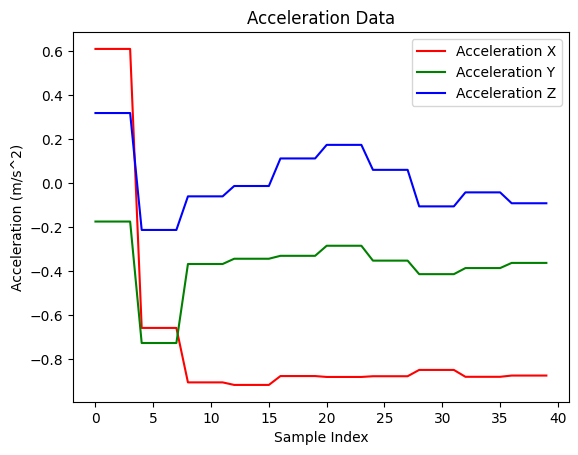

In [80]:
# plot 
import matplotlib.pyplot as plt

def plot_acceleration(df):
    """
    Plot the acceleration data from the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing acceleration data.
    """

    plt.plot(df['acc_x'], label='Acceleration X', color='r')
    plt.plot(df['acc_y'], label='Acceleration Y', color='g')
    plt.plot(df['acc_z'], label='Acceleration Z', color='b')
    plt.title('Acceleration Data')
    plt.xlabel('Sample Index')
    plt.ylabel('Acceleration (m/s^2)')
    plt.legend()
    plt.show()

plot_acceleration(df)




In [81]:
from scipy import interpolate


df['TIME'] = pd.to_datetime(df['TIME'])

# Calculate actual sampling frequency
df['time_sec'] = (df['TIME'] - df['TIME'].iloc[0]).dt.total_seconds()
original_freq = 1 / df['time_sec'].diff().mean()
print(f"Original freq: {original_freq:.2f} Hz")

# Resample to 200 Hz
new_freq = 200
new_time = np.arange(0, df['time_sec'].iloc[-1], 1 / new_freq)

# Interpolate
interp_x = interpolate.interp1d(df['time_sec'], df['acc_x'], kind='linear')
interp_y = interpolate.interp1d(df['time_sec'], df['acc_y'], kind='linear')
interp_z = interpolate.interp1d(df['time_sec'], df['acc_z'], kind='linear')

df_resampled = pd.DataFrame({
    'acc_x': interp_x(new_time),
    'acc_y': interp_y(new_time),
    'acc_z': interp_z(new_time)
})

df_resampled

Original freq: 4.33 Hz


,acc_x,acc_y,acc_z
0,0.611133,-0.174467,0.319367
1,0.604785,-0.177231,0.316706
2,0.598436,-0.179995,0.314046
3,0.592088,-0.182758,0.311386
4,0.585739,-0.185522,0.308726
...,...,...,...
1795,-0.875492,-0.363288,-0.090011
1796,-0.875463,-0.363170,-0.090259
1797,-0.875435,-0.363053,-0.090507
1798,-0.875407,-0.362935,-0.090755


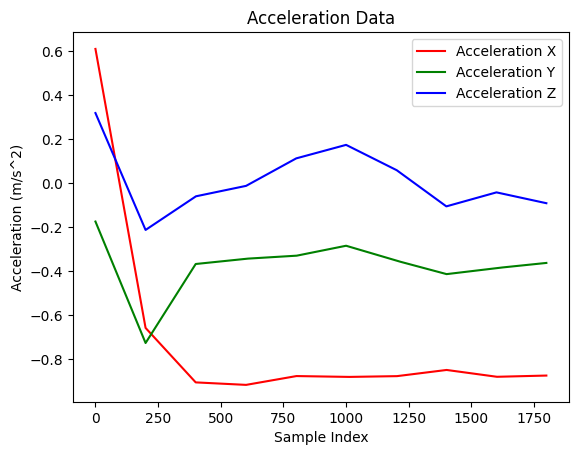

In [82]:
plot_acceleration(df_resampled)

In [83]:
df_resampled.shape

(1800, 3)

In [84]:
har_features = extract_features(df_resampled,True)
har_features

,mean_acc_x,mean_acc_y,mean_acc_z,mean_mag_acc,var_acc_x,var_acc_y,var_acc_z,var_mag_acc,std_acc_x,std_acc_y,...,ptp_acc_z,ptp_mag_acc,centile25_acc_x,centile25_acc_y,centile25_acc_z,centile25_mag_acc,centile75_acc_x,centile75_acc_y,centile75_acc_z,centile75_mag_acc
0,-0.775549,-0.386025,0.003415,0.918316,0.087966,0.009115,0.011269,0.01555,0.296591,0.095474,...,0.53205,0.581932,-0.881292,-0.399649,-0.07292,0.943538,-0.856475,-0.333621,0.095792,0.964132


In [85]:
# load_model
def load_model(model_path):
    """    Load a pre-trained model from the specified path.
    Parameters:
    model_path (str): The path to the model file.   
    Returns:
    model: The loaded model.
    """
    
    try:
        model = joblib.load(model_path)
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None 
    

svm_model = load_model('models/svm_model.pkl')

svm_model

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [86]:
svm_model.predict(har_features)

array(['sitting'], dtype=object)